In [87]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [88]:
def d_cohen(x, y):
    cohen_d = (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x) ** 2 + np.std(y) ** 2) / 2)
    return cohen_d

def linear_regression_pvalue(x, y):
    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    results = model.fit()
    return results.pvalues[1]

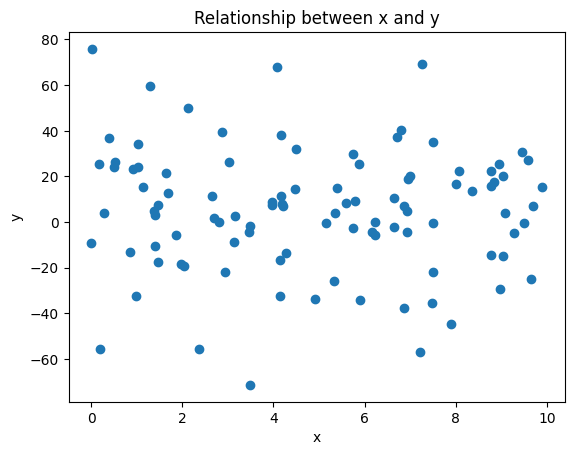

In [89]:
np.random.seed(1)
n = 100
x = np.random.uniform(0, 10, n)
y = 0.5*x + np.random.normal(0, 30, n)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Relationship between x and y')
plt.show()
fig.savefig('../../img/graph/x_vs_y.png')


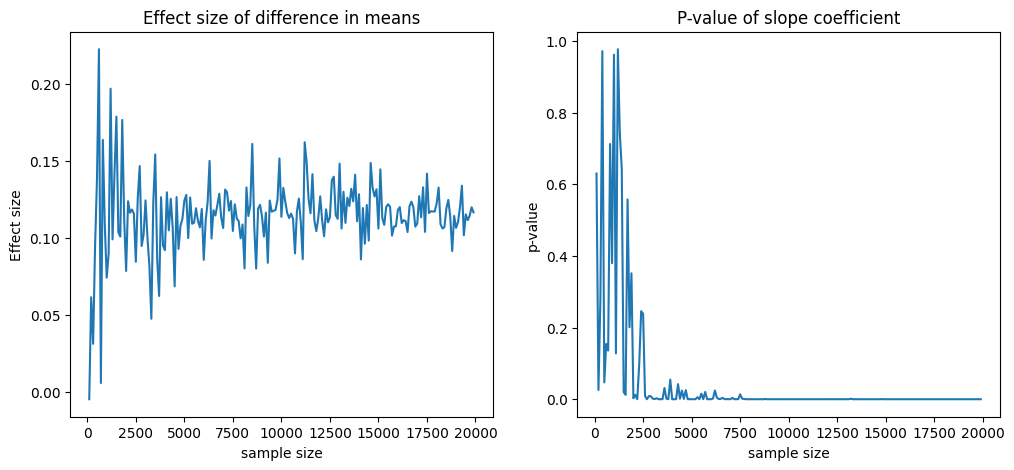

CPU times: user 3.07 s, sys: 1.89 s, total: 4.96 s
Wall time: 556 ms


In [90]:
%%time
np.random.seed(1)
pvalues = []
d_cohen_values = []
start = 100
stop = 20000
for n in range(start, stop, 100):
    x = np.random.uniform(0, 10, n)
    y = 0.5*x + np.random.normal(0, 30, n)
    pvalues.append(linear_regression_pvalue(x, y))
    d_cohen_values.append(d_cohen(x, y))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].plot(range(start, stop, 100), d_cohen_values)
ax[0].set_xlabel('sample size')
ax[0].set_ylabel('Effect size')
ax[0].set_title('Effect size of difference in means')
ax[1].plot(range(start, stop, 100), pvalues)
ax[1].set_xlabel('sample size')
ax[1].set_ylabel('p-value')
ax[1].set_title('P-value of slope coefficient')
plt.show()
fig.savefig('../../img/graph/linear_regression_pvalue.png')